In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sbn
import time
from functools import reduce
from scipy.stats import spearmanr
import statsmodels.api as sm
import numpy as np

In [45]:
df = pd.read_csv('hotel_bookings_clean.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118087 entries, 0 to 118086
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118087 non-null  object 
 1   is_canceled                     118087 non-null  bool   
 2   lead_time                       118087 non-null  int64  
 3   arrival_date_month              118087 non-null  object 
 4   stays_in_weekend_nights         118087 non-null  int64  
 5   stays_in_week_nights            118087 non-null  int64  
 6   adults                          118087 non-null  int64  
 7   children                        118087 non-null  int64  
 8   babies                          118087 non-null  int64  
 9   meal                            118087 non-null  object 
 10  market_segment                  118087 non-null  object 
 11  distribution_channel            118087 non-null  object 
 12  is_repeated_gues

In [47]:
pd.set_option('display.max_columns', None)
df.head(50)

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_length_of_stay,arrival_date,country_name
0,Resort Hotel,False,7,July,0,1,1,0,0,BB,Direct,Direct,False,0,False,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,2015-07-01,United Kingdom
1,Resort Hotel,False,13,July,0,1,1,0,0,BB,Corporate,Corporate,False,0,False,A,A,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,2015-07-01,United Kingdom
2,Resort Hotel,False,14,July,0,2,2,0,0,BB,Online TA,TA/TO,False,0,False,A,A,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2015-07-01,United Kingdom
3,Resort Hotel,False,14,July,0,2,2,0,0,BB,Online TA,TA/TO,False,0,False,A,A,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2015-07-01,United Kingdom
4,Resort Hotel,False,0,July,0,2,2,0,0,BB,Direct,Direct,False,0,False,C,C,0,No Deposit,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2,2015-07-01,Portugal
5,Resort Hotel,False,9,July,0,2,2,0,0,FB,Direct,Direct,False,0,False,C,C,0,No Deposit,303,0,Transient,103.00,0,1,Check-Out,2015-07-03,2,2015-07-01,Portugal
6,Resort Hotel,True,85,July,0,3,2,0,0,BB,Online TA,TA/TO,False,0,False,A,A,0,No Deposit,240,0,Transient,82.00,0,1,Canceled,2015-05-06,3,2015-07-01,Portugal
7,Resort Hotel,True,75,July,0,3,2,0,0,HB,Offline TA/TO,TA/TO,False,0,False,D,D,0,No Deposit,15,0,Transient,105.50,0,0,Canceled,2015-04-22,3,2015-07-01,Portugal
8,Resort Hotel,True,23,July,0,4,2,0,0,BB,Online TA,TA/TO,False,0,False,E,E,0,No Deposit,240,0,Transient,123.00,0,0,Canceled,2015-06-23,4,2015-07-01,Portugal
9,Resort Hotel,False,35,July,0,4,2,0,0,HB,Online TA,TA/TO,False,0,False,D,D,0,No Deposit,240,0,Transient,145.00,0,0,Check-Out,2015-07-05,4,2015-07-01,Portugal


 # Relación entre Lead Time y Cancelaciones

## Análisis de la distribución del Lead time (histograma)

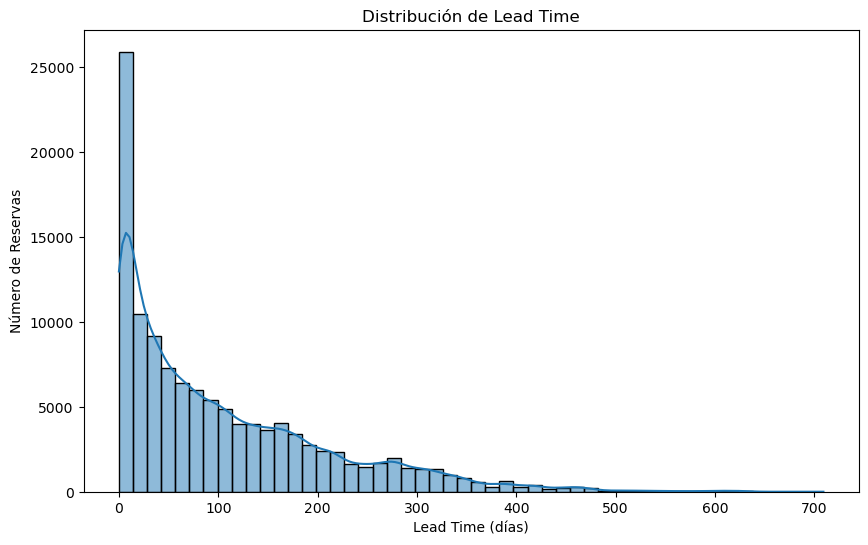

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de lead_time
plt.figure(figsize=(10,6))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribución de Lead Time')
plt.xlabel('Lead Time (días)')
plt.ylabel('Número de Reservas')
plt.show()


#### Como se puede apreciar, cuanto más cerca es el día del check-in del día de la reserva (reservas de última hora o insitu), mayor es el número de reservas y al revés, cuato mayor es el Lead Time, menor es el número de reservas

## Análisis de la Tasa de Cancelación según el Lead time

In [54]:
# Definir los rangos
bins = [0, 7, 30, 90, df['lead_time'].max()]
labels = ['0-7 días', '8-30 días', '31-90 días', '>90 días']

# Crear nueva columna categórica
df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels)

# Agrupar por lead_time_group
cancelaciones_por_grupo = df.groupby('lead_time_group', observed=False)['is_canceled'].mean() * 100


print(cancelaciones_por_grupo)





lead_time_group
0-7 días      11.118779
8-30 días     28.055600
31-90 días    37.848226
>90 días      50.735698
Name: is_canceled, dtype: float64


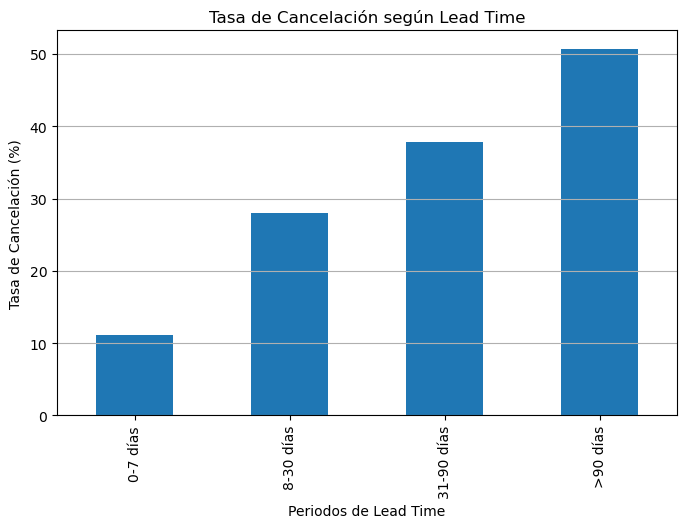

In [50]:
# Gráfico de barras
plt.figure(figsize=(8,5))
cancelaciones_por_grupo.plot(kind='bar')
plt.title('Tasa de Cancelación según Lead Time')
plt.xlabel('Periodos de Lead Time')
plt.ylabel('Tasa de Cancelación (%)')
plt.grid(axis='y')
plt.show()

#### A mayor número de días en los periodos del Lead Time, mayor es la Tasa de cancelacion. Por tanto vamos a analizar si existe correlación entre el lead time y la cancelacion (is_canceled)

# Planteamiento de Hipótesis

##### H0= No hay correlación entre Lead Time y la cancelacion de la reserva (is_canceled)
##### H1= Hay correlación entre Lead Time y la cancelacion de la reserva (is_canceled)

##### Tal y como se aprecia en las gráficas, las variables no siguen una distribucion normal, por tanto para analizar la correlacion entre las variables emplearé la correlacion de Spearman, debido a que una de las variables es binaria

### Correlacion de Spearman

In [51]:
spearman_corr, p_value = spearmanr(df['lead_time'], df['is_canceled'])

print(f"Correlación de Spearman: {spearman_corr:.4f}")
print(f"P-valor: {p_value:.4f}")



Correlación de Spearman: 0.3130
P-valor: 0.0000


###### ✅ La relacion es positiva y moderada
###### ✅ Esto indica que a mayor lead time, hay más probabilidad de cancelación.
###### ✅  Spearman (0.32):  sugiere que la relación podría no ser perfectamente lineal, pero sí monótona: cuanto más anticipada la reserva, más probable es la cancelación.

### Regresión Logística

##### H0= No hay relación entre Lead Time y la cancelacion de la reserva (is_canceled)
##### H1= Hay relación entre Lead Time y la cancelacion de la reserva (is_canceled)

Optimization terminated successfully.
         Current function value: 0.618732
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               118087
Model:                          Logit   Df Residuals:                   118085
Method:                           MLE   Df Model:                            1
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                 0.06370
Time:                        13:18:35   Log-Likelihood:                -73064.
converged:                       True   LL-Null:                       -78035.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1482      0.009   -124.430      0.000      -1.166      -1.130
lead_time      0.0058   6.15e

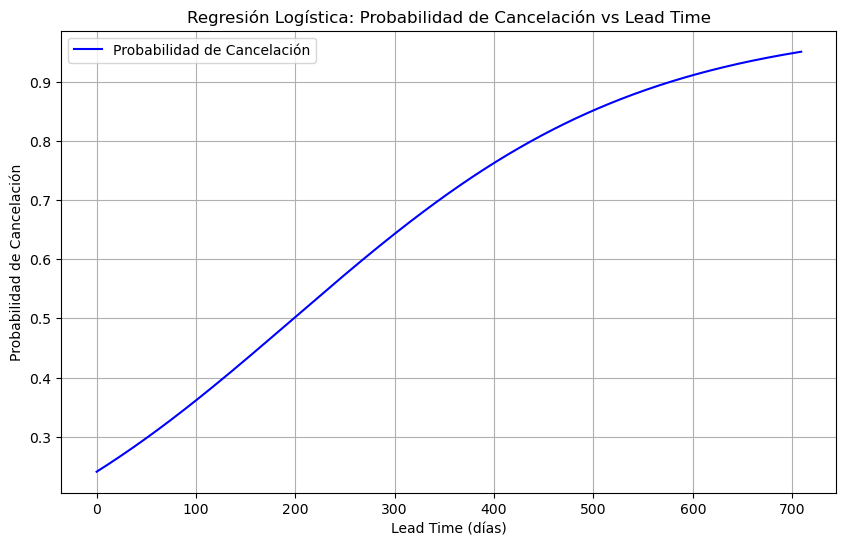

In [52]:
# Variables
X = df['lead_time']
y = df['is_canceled']

# Añadir constante (intercepto)
X_const = sm.add_constant(X)

# Modelo de regresión logística
model = sm.Logit(y, X_const)
result = model.fit()

# Mostrar resumen del modelo
print(result.summary())

# Predecir probabilidades en un rango de lead_time
lead_range = np.linspace(0, X.max(), 500)
X_pred = sm.add_constant(lead_range)
y_pred_prob = result.predict(X_pred)

# Gráfico de la curva logística
plt.figure(figsize=(10, 6))
plt.plot(lead_range, y_pred_prob, label='Probabilidad de Cancelación', color='blue')
plt.xlabel('Lead Time (días)')
plt.ylabel('Probabilidad de Cancelación')
plt.title('Regresión Logística: Probabilidad de Cancelación vs Lead Time')
plt.grid(True)
plt.legend()
plt.show()

###### Como se puede apreciar, el gráfico visualiza claramente cómo la probabilidad de cancelación aumenta con el lead time, lo que refuerza lo que mostró la correlación de Spearman.

## Conclusión

##### Por tanto, se puede concluir que existe una correlación positiva entre el tiempo de anticipación de la reserva y la probabilidad de cancelarla